In [5]:
import sys

module_dir = '../'

if module_dir not in sys.path:
    sys.path.append(module_dir)

import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from models import *
import test_systems_1d as systems_1d
import itertools
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import NoNorm
from tqdm import tqdm
import gpjax as gpx
from sklearn.decomposition import PCA
import scipy.io
from scipy.interpolate import griddata
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF

In [6]:
def get_data(ntrain, ntest):
    # amount of subsampling
    sub_x = 2 ** 6
    sub_y = 2 ** 6

    # Data is of the shape (number of samples = 2048, grid size = 2^13)
    data = scipy.io.loadmat("../burgers_data/burgers_data_R10.mat")
    x_data = data["a"][:, ::sub_x].astype(np.float64)
    y_data = data["u"][:, ::sub_y].astype(np.float64)
    x_branch_train = x_data[:ntrain, :]
    y_train = y_data[:ntrain, :]
    x_branch_test = x_data[-ntest:, :]
    y_test = y_data[-ntest:, :]

    s = 2 ** 13 // sub_y  # total grid size divided by the subsampling rate
    grid = np.linspace(0, 1, num=2 ** 13)[::sub_y, None]

    x_train = (x_branch_train, grid)
    x_test = (x_branch_test, grid)
    return x_train, y_train, x_test, y_test

n_samples_train = 1000
n_samples_test = 200

x_train, y_train, x_test, y_test = get_data(n_samples_train, n_samples_test)

domain = x_train[1]
x_train = x_train[0]
x_test = x_test[0]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(1000, 128) (1000, 128)
(200, 128) (200, 128)


# pure reproduction using sklearn

In [7]:
x_low_dim = 10

model2 = second_model(x_low_dim = x_low_dim)

kernel = Matern(nu=2.5) # RBF(np.ones(x_low_dim)) --- include length_scale=np.ones(x_low_dim), for ARD kernel
gp = GaussianProcessRegressor(kernel, alpha = 1e-10,  normalize_y = True, random_state= 1172023)

y_pred = model2.train_test(x_train, x_test, y_train, gp, verbose = True)

  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<02:05,  1.01it/s]

Matern(length_scale=12.4, nu=2.5)


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
  2%|▏         | 2/128 [00:03<04:19,  2.06s/it]

Matern(length_scale=12.5, nu=2.5)


  2%|▏         | 3/128 [00:04<03:04,  1.48s/it]

Matern(length_scale=12.7, nu=2.5)


  3%|▎         | 4/128 [00:05<02:23,  1.15s/it]

Matern(length_scale=12.9, nu=2.5)


  4%|▍         | 5/128 [00:06<02:04,  1.01s/it]

Matern(length_scale=13, nu=2.5)


  5%|▍         | 6/128 [00:06<01:54,  1.07it/s]

Matern(length_scale=13, nu=2.5)


  5%|▌         | 7/128 [00:07<01:45,  1.15it/s]

Matern(length_scale=12.9, nu=2.5)


  6%|▋         | 8/128 [00:08<01:41,  1.18it/s]

Matern(length_scale=12.9, nu=2.5)


  7%|▋         | 9/128 [00:09<01:48,  1.09it/s]

Matern(length_scale=13, nu=2.5)


  8%|▊         | 10/128 [00:10<01:49,  1.08it/s]

Matern(length_scale=13.2, nu=2.5)


  9%|▊         | 11/128 [00:11<01:52,  1.04it/s]

Matern(length_scale=13.3, nu=2.5)


  9%|▉         | 12/128 [00:12<02:02,  1.05s/it]

Matern(length_scale=13.4, nu=2.5)


 10%|█         | 13/128 [00:13<02:04,  1.09s/it]

Matern(length_scale=13.4, nu=2.5)


 11%|█         | 14/128 [00:15<02:15,  1.19s/it]

Matern(length_scale=13.2, nu=2.5)


 12%|█▏        | 15/128 [00:16<02:03,  1.09s/it]

Matern(length_scale=12.9, nu=2.5)


 12%|█▎        | 16/128 [00:17<01:57,  1.05s/it]

Matern(length_scale=12.7, nu=2.5)


 13%|█▎        | 17/128 [00:17<01:49,  1.02it/s]

Matern(length_scale=12.7, nu=2.5)


 14%|█▍        | 18/128 [00:18<01:42,  1.07it/s]

Matern(length_scale=12.7, nu=2.5)


 15%|█▍        | 19/128 [00:19<01:39,  1.10it/s]

Matern(length_scale=12.7, nu=2.5)


 16%|█▌        | 20/128 [00:21<02:23,  1.33s/it]

Matern(length_scale=12.8, nu=2.5)


 16%|█▋        | 21/128 [00:22<02:05,  1.17s/it]

Matern(length_scale=13, nu=2.5)


 17%|█▋        | 22/128 [00:23<01:54,  1.08s/it]

Matern(length_scale=13.1, nu=2.5)


 18%|█▊        | 23/128 [00:24<01:42,  1.02it/s]

Matern(length_scale=13, nu=2.5)


 19%|█▉        | 24/128 [00:25<01:36,  1.08it/s]

Matern(length_scale=12.8, nu=2.5)


 20%|█▉        | 25/128 [00:25<01:31,  1.12it/s]

Matern(length_scale=12.7, nu=2.5)


 20%|██        | 26/128 [00:26<01:28,  1.16it/s]

Matern(length_scale=12.6, nu=2.5)


 21%|██        | 27/128 [00:27<01:25,  1.18it/s]

Matern(length_scale=12.7, nu=2.5)


 22%|██▏       | 28/128 [00:28<01:24,  1.19it/s]

Matern(length_scale=12.9, nu=2.5)


 23%|██▎       | 29/128 [00:29<01:26,  1.14it/s]

Matern(length_scale=13.2, nu=2.5)


 23%|██▎       | 30/128 [00:30<01:45,  1.08s/it]

Matern(length_scale=13.3, nu=2.5)


 24%|██▍       | 31/128 [00:31<01:39,  1.03s/it]

Matern(length_scale=13.1, nu=2.5)


 25%|██▌       | 32/128 [00:32<01:29,  1.07it/s]

Matern(length_scale=12.9, nu=2.5)


 26%|██▌       | 33/128 [00:33<01:25,  1.11it/s]

Matern(length_scale=12.8, nu=2.5)


 27%|██▋       | 34/128 [00:34<01:20,  1.16it/s]

Matern(length_scale=12.8, nu=2.5)


 27%|██▋       | 35/128 [00:34<01:18,  1.18it/s]

Matern(length_scale=13, nu=2.5)


 28%|██▊       | 36/128 [00:35<01:21,  1.13it/s]

Matern(length_scale=13.3, nu=2.5)


 29%|██▉       | 37/128 [00:36<01:22,  1.10it/s]

Matern(length_scale=13.4, nu=2.5)


 30%|██▉       | 38/128 [00:37<01:21,  1.11it/s]

Matern(length_scale=13.2, nu=2.5)


 30%|███       | 39/128 [00:38<01:16,  1.16it/s]

Matern(length_scale=13, nu=2.5)


 31%|███▏      | 40/128 [00:39<01:14,  1.18it/s]

Matern(length_scale=12.7, nu=2.5)


 32%|███▏      | 41/128 [00:40<01:13,  1.19it/s]

Matern(length_scale=12.6, nu=2.5)


 33%|███▎      | 42/128 [00:41<01:15,  1.14it/s]

Matern(length_scale=12.6, nu=2.5)


 34%|███▎      | 43/128 [00:41<01:13,  1.16it/s]

Matern(length_scale=12.7, nu=2.5)


 34%|███▍      | 44/128 [00:42<01:11,  1.17it/s]

Matern(length_scale=12.8, nu=2.5)


 35%|███▌      | 45/128 [00:43<01:10,  1.17it/s]

Matern(length_scale=12.7, nu=2.5)


 36%|███▌      | 46/128 [00:44<01:10,  1.16it/s]

Matern(length_scale=12.4, nu=2.5)


 37%|███▋      | 47/128 [00:45<01:14,  1.09it/s]

Matern(length_scale=12.2, nu=2.5)


 38%|███▊      | 48/128 [00:46<01:16,  1.04it/s]

Matern(length_scale=12.2, nu=2.5)


 38%|███▊      | 49/128 [00:47<01:17,  1.02it/s]

Matern(length_scale=12.3, nu=2.5)


 39%|███▉      | 50/128 [00:48<01:17,  1.01it/s]

Matern(length_scale=12.3, nu=2.5)


 40%|███▉      | 51/128 [00:49<01:17,  1.00s/it]

Matern(length_scale=12.3, nu=2.5)


 41%|████      | 52/128 [00:50<01:13,  1.03it/s]

Matern(length_scale=12.4, nu=2.5)


 41%|████▏     | 53/128 [00:51<01:11,  1.05it/s]

Matern(length_scale=12.6, nu=2.5)


 42%|████▏     | 54/128 [00:52<01:07,  1.09it/s]

Matern(length_scale=12.7, nu=2.5)


 43%|████▎     | 55/128 [00:53<01:05,  1.11it/s]

Matern(length_scale=12.8, nu=2.5)


 44%|████▍     | 56/128 [00:53<01:02,  1.16it/s]

Matern(length_scale=12.8, nu=2.5)


 45%|████▍     | 57/128 [00:54<01:00,  1.18it/s]

Matern(length_scale=12.7, nu=2.5)


 45%|████▌     | 58/128 [00:55<00:59,  1.18it/s]

Matern(length_scale=12.6, nu=2.5)


 46%|████▌     | 59/128 [00:56<00:59,  1.16it/s]

Matern(length_scale=12.6, nu=2.5)


 47%|████▋     | 60/128 [00:57<00:57,  1.17it/s]

Matern(length_scale=12.7, nu=2.5)


 48%|████▊     | 61/128 [00:58<00:56,  1.19it/s]

Matern(length_scale=13, nu=2.5)


 48%|████▊     | 62/128 [01:00<01:16,  1.16s/it]

Matern(length_scale=13.1, nu=2.5)


 49%|████▉     | 63/128 [01:00<01:06,  1.02s/it]

Matern(length_scale=12.9, nu=2.5)


 50%|█████     | 64/128 [01:01<01:02,  1.02it/s]

Matern(length_scale=12.5, nu=2.5)


 51%|█████     | 65/128 [01:02<01:00,  1.04it/s]

Matern(length_scale=12.4, nu=2.5)


 52%|█████▏    | 66/128 [01:03<01:01,  1.02it/s]

Matern(length_scale=12.5, nu=2.5)


 52%|█████▏    | 67/128 [01:04<00:59,  1.02it/s]

Matern(length_scale=12.7, nu=2.5)


 53%|█████▎    | 68/128 [01:05<00:59,  1.02it/s]

Matern(length_scale=12.9, nu=2.5)


 54%|█████▍    | 69/128 [01:06<00:57,  1.03it/s]

Matern(length_scale=13, nu=2.5)


 55%|█████▍    | 70/128 [01:07<00:53,  1.08it/s]

Matern(length_scale=13, nu=2.5)


 55%|█████▌    | 71/128 [01:08<00:51,  1.10it/s]

Matern(length_scale=12.8, nu=2.5)


 56%|█████▋    | 72/128 [01:08<00:49,  1.13it/s]

Matern(length_scale=12.7, nu=2.5)


 57%|█████▋    | 73/128 [01:09<00:48,  1.13it/s]

Matern(length_scale=12.6, nu=2.5)


 58%|█████▊    | 74/128 [01:11<01:08,  1.26s/it]

Matern(length_scale=12.5, nu=2.5)


 59%|█████▊    | 75/128 [01:13<01:04,  1.22s/it]

Matern(length_scale=12.5, nu=2.5)


 59%|█████▉    | 76/128 [01:14<01:02,  1.20s/it]

Matern(length_scale=12.5, nu=2.5)


 60%|██████    | 77/128 [01:15<00:59,  1.16s/it]

Matern(length_scale=12.6, nu=2.5)


 61%|██████    | 78/128 [01:16<00:55,  1.10s/it]

Matern(length_scale=12.6, nu=2.5)


 62%|██████▏   | 79/128 [01:17<00:51,  1.05s/it]

Matern(length_scale=12.6, nu=2.5)


 62%|██████▎   | 80/128 [01:18<00:50,  1.05s/it]

Matern(length_scale=12.7, nu=2.5)


 63%|██████▎   | 81/128 [01:19<00:46,  1.00it/s]

Matern(length_scale=12.8, nu=2.5)


 64%|██████▍   | 82/128 [01:19<00:43,  1.07it/s]

Matern(length_scale=13, nu=2.5)


 65%|██████▍   | 83/128 [01:21<00:44,  1.02it/s]

Matern(length_scale=13.1, nu=2.5)


 66%|██████▌   | 84/128 [01:21<00:41,  1.06it/s]

Matern(length_scale=13.1, nu=2.5)


 66%|██████▋   | 85/128 [01:22<00:38,  1.10it/s]

Matern(length_scale=13, nu=2.5)


 67%|██████▋   | 86/128 [01:23<00:36,  1.14it/s]

Matern(length_scale=13, nu=2.5)


 68%|██████▊   | 87/128 [01:24<00:36,  1.12it/s]

Matern(length_scale=13.2, nu=2.5)


 69%|██████▉   | 88/128 [01:25<00:38,  1.03it/s]

Matern(length_scale=13.6, nu=2.5)


 70%|██████▉   | 89/128 [01:27<00:44,  1.15s/it]

Matern(length_scale=13.7, nu=2.5)


 70%|███████   | 90/128 [01:28<00:41,  1.08s/it]

Matern(length_scale=13.4, nu=2.5)


 71%|███████   | 91/128 [01:28<00:37,  1.01s/it]

Matern(length_scale=13.1, nu=2.5)


 72%|███████▏  | 92/128 [01:29<00:33,  1.06it/s]

Matern(length_scale=13, nu=2.5)


 73%|███████▎  | 93/128 [01:30<00:34,  1.03it/s]

Matern(length_scale=13.3, nu=2.5)


 73%|███████▎  | 94/128 [01:32<00:36,  1.09s/it]

Matern(length_scale=13.7, nu=2.5)


 74%|███████▍  | 95/128 [01:33<00:34,  1.03s/it]

Matern(length_scale=13.8, nu=2.5)


 75%|███████▌  | 96/128 [01:33<00:31,  1.00it/s]

Matern(length_scale=13.5, nu=2.5)


 76%|███████▌  | 97/128 [01:34<00:29,  1.04it/s]

Matern(length_scale=13.1, nu=2.5)


 77%|███████▋  | 98/128 [01:35<00:26,  1.14it/s]

Matern(length_scale=12.9, nu=2.5)


 77%|███████▋  | 99/128 [01:36<00:24,  1.20it/s]

Matern(length_scale=12.9, nu=2.5)


 78%|███████▊  | 100/128 [01:37<00:23,  1.18it/s]

Matern(length_scale=13.2, nu=2.5)


 79%|███████▉  | 101/128 [01:38<00:23,  1.15it/s]

Matern(length_scale=13.5, nu=2.5)


 80%|███████▉  | 102/128 [01:38<00:22,  1.13it/s]

Matern(length_scale=13.5, nu=2.5)


 80%|████████  | 103/128 [01:39<00:21,  1.14it/s]

Matern(length_scale=13.2, nu=2.5)


 81%|████████▏ | 104/128 [01:40<00:19,  1.20it/s]

Matern(length_scale=12.9, nu=2.5)


 82%|████████▏ | 105/128 [01:41<00:21,  1.07it/s]

Matern(length_scale=12.8, nu=2.5)


 83%|████████▎ | 106/128 [01:42<00:21,  1.03it/s]

Matern(length_scale=13, nu=2.5)


 84%|████████▎ | 107/128 [01:43<00:20,  1.05it/s]

Matern(length_scale=13.3, nu=2.5)


 84%|████████▍ | 108/128 [01:44<00:18,  1.06it/s]

Matern(length_scale=13.4, nu=2.5)


 85%|████████▌ | 109/128 [01:46<00:22,  1.20s/it]

Matern(length_scale=13.2, nu=2.5)


 86%|████████▌ | 110/128 [01:47<00:19,  1.07s/it]

Matern(length_scale=12.9, nu=2.5)


 87%|████████▋ | 111/128 [01:47<00:16,  1.03it/s]

Matern(length_scale=12.8, nu=2.5)


 88%|████████▊ | 112/128 [01:48<00:14,  1.08it/s]

Matern(length_scale=13, nu=2.5)


 88%|████████▊ | 113/128 [01:49<00:14,  1.05it/s]

Matern(length_scale=13.2, nu=2.5)


 89%|████████▉ | 114/128 [01:50<00:12,  1.08it/s]

Matern(length_scale=13.2, nu=2.5)


 90%|████████▉ | 115/128 [01:51<00:11,  1.13it/s]

Matern(length_scale=13, nu=2.5)


 91%|█████████ | 116/128 [01:52<00:09,  1.22it/s]

Matern(length_scale=12.9, nu=2.5)


 91%|█████████▏| 117/128 [01:52<00:08,  1.26it/s]

Matern(length_scale=13, nu=2.5)


 92%|█████████▏| 118/128 [01:53<00:08,  1.23it/s]

Matern(length_scale=13.2, nu=2.5)


 93%|█████████▎| 119/128 [01:54<00:07,  1.20it/s]

Matern(length_scale=13.2, nu=2.5)


 94%|█████████▍| 120/128 [01:55<00:06,  1.16it/s]

Matern(length_scale=13.1, nu=2.5)


 95%|█████████▍| 121/128 [01:56<00:05,  1.21it/s]

Matern(length_scale=13, nu=2.5)


 95%|█████████▌| 122/128 [01:56<00:04,  1.24it/s]

Matern(length_scale=12.9, nu=2.5)


 96%|█████████▌| 123/128 [01:57<00:03,  1.31it/s]

Matern(length_scale=12.9, nu=2.5)


 97%|█████████▋| 124/128 [01:58<00:03,  1.32it/s]

Matern(length_scale=12.9, nu=2.5)


 98%|█████████▊| 125/128 [01:59<00:02,  1.30it/s]

Matern(length_scale=12.9, nu=2.5)


 98%|█████████▊| 126/128 [01:59<00:01,  1.32it/s]

Matern(length_scale=12.8, nu=2.5)


 99%|█████████▉| 127/128 [02:00<00:00,  1.30it/s]

Matern(length_scale=12.6, nu=2.5)


100%|██████████| 128/128 [02:01<00:00,  1.05it/s]

Matern(length_scale=12.5, nu=2.5)


(200, 2, 128)
0.019600556495780914


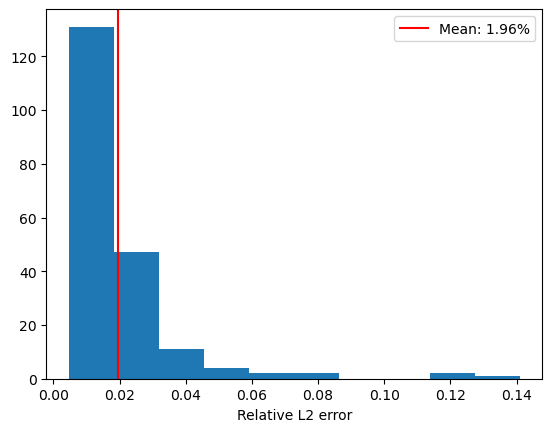

In [ ]:
y_pred_mean = y_pred[:, 0, :]
y_pred_std = y_pred[:, 1, :]

print(y_pred.shape)
relative_L2 = np.linalg.norm(y_pred_mean - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1)

print(np.mean(relative_L2))

plt.figure()
plt.hist(relative_L2)
plt.axvline(np.mean(relative_L2), color = 'r', label = f"Mean: {round(np.mean(relative_L2)*100, 2)}%")
plt.xlabel("Relative L2 error")
plt.legend()
plt.show()

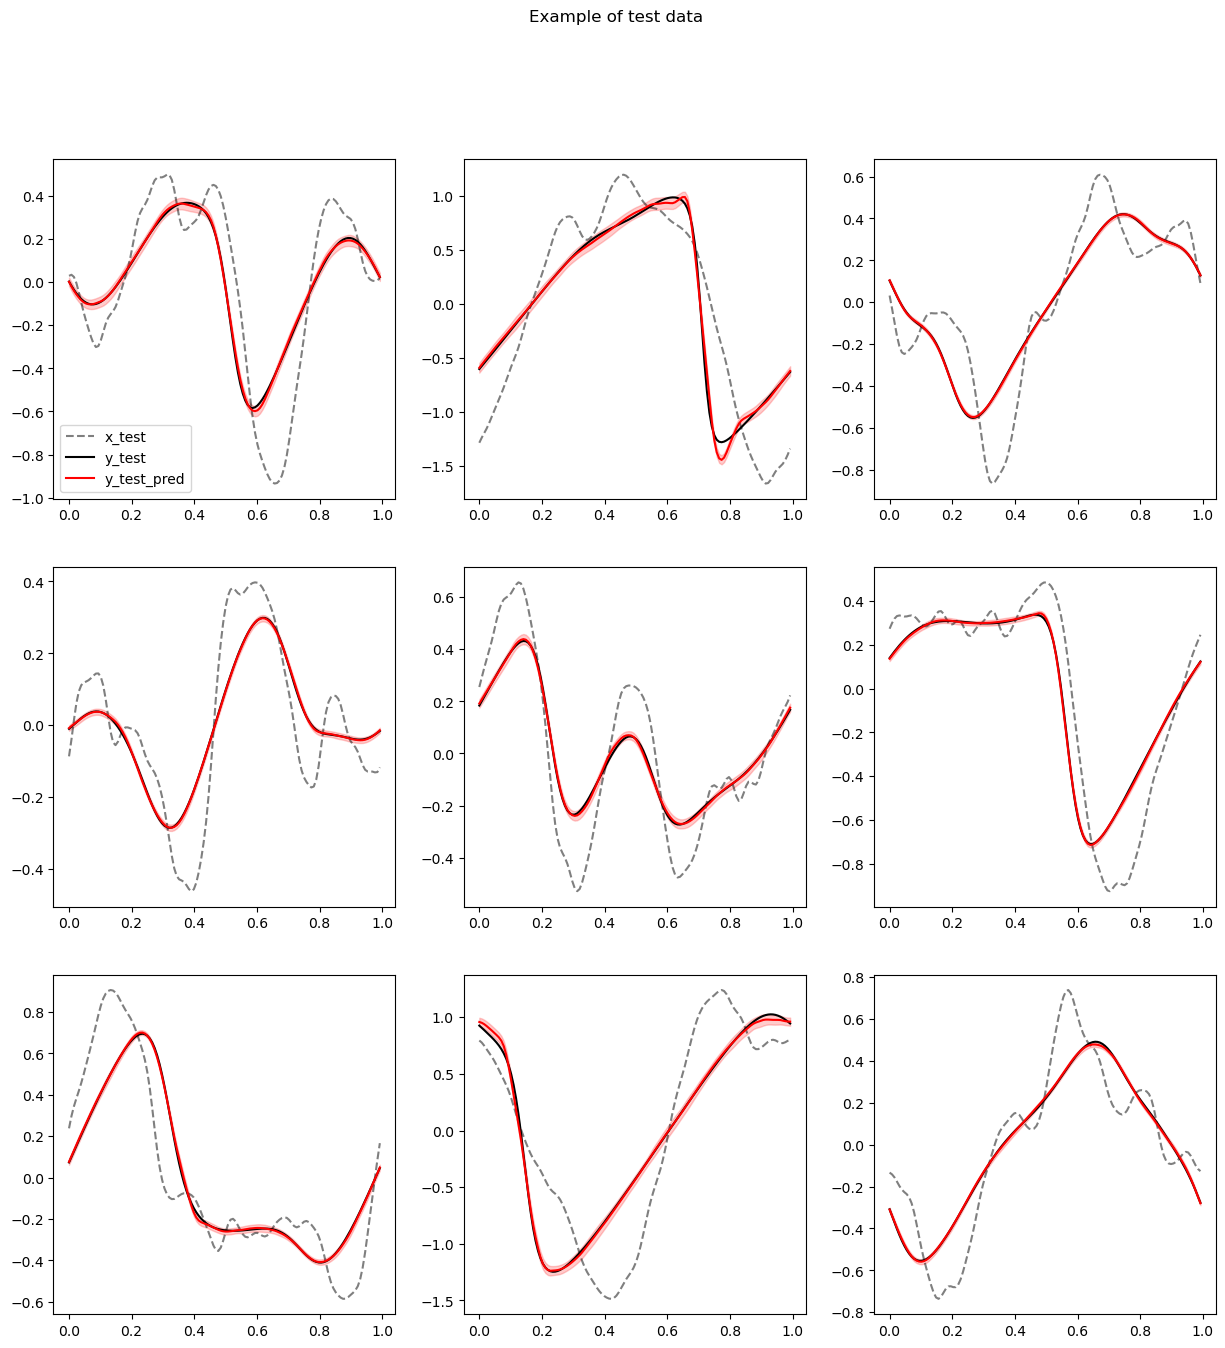

In [ ]:
fig1, ax1 = plt.subplots(3, 3, figsize=(15, 15))
fig1.suptitle('Example of test data')
for i in range(9):
    ax = ax1[int(np.floor((i)/3)), int(i%3)]
    ax.plot(domain, x_test[i, :].T, label="x_test", linestyle='--', color='black', alpha=0.5)
    ax.plot(domain, y_test[i, :].T, label="y_test", color='black')
    ax.plot(domain, y_pred_mean[i, :].T, label="y_test_pred", color='red')
    ax.fill_between(domain[:, 0], y_pred_mean[i, :]-2*y_pred_std[i, :], y_pred_mean[i, :]+2*y_pred_std[i, :], color='red', alpha = 0.2)
    if i == 0:
        ax.legend()
    
plt.show()

# sklearn reproduction using separate train and predict functions

In [4]:
n = 10
m = None

model4 = fourth_model(n = n, m = m, multiinput = True)

model4.fit(x_train, y_train)

  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:01<02:08,  1.02s/it]

Matern(length_scale=42.3, nu=2.5)


  2%|▏         | 2/128 [00:03<04:20,  2.07s/it]

Matern(length_scale=41.6, nu=2.5)


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
  2%|▏         | 3/128 [00:07<05:23,  2.59s/it]

Matern(length_scale=18.5, nu=2.5)


  3%|▎         | 4/128 [00:08<04:45,  2.31s/it]

Matern(length_scale=18.2, nu=2.5)


  4%|▍         | 5/128 [00:09<03:42,  1.81s/it]

Matern(length_scale=11.1, nu=2.5)


  5%|▍         | 6/128 [00:10<03:03,  1.50s/it]

Matern(length_scale=11, nu=2.5)


  5%|▌         | 7/128 [00:11<02:44,  1.36s/it]

Matern(length_scale=7.95, nu=2.5)


  6%|▋         | 8/128 [00:12<02:34,  1.29s/it]

Matern(length_scale=7.63, nu=2.5)


  7%|▋         | 9/128 [00:13<02:15,  1.14s/it]

Matern(length_scale=6, nu=2.5)


  8%|▊         | 10/128 [00:14<02:07,  1.08s/it]

Matern(length_scale=5.92, nu=2.5)


  9%|▊         | 11/128 [00:15<02:01,  1.04s/it]

Matern(length_scale=4.76, nu=2.5)


  9%|▉         | 12/128 [00:16<01:58,  1.02s/it]

Matern(length_scale=4.82, nu=2.5)


 10%|█         | 13/128 [00:17<01:54,  1.01it/s]

Matern(length_scale=4, nu=2.5)


 10%|█         | 13/128 [00:18<02:39,  1.39s/it]


KeyboardInterrupt: 

In [4]:
############## Testing on training data

y_train_pred = model4.predict(x_train)

relative_L2 = np.linalg.norm(y_train_pred - y_train, axis = -1)/np.linalg.norm(y_train, axis = -1)
print(f'on training data: {np.mean(relative_L2)}')

############### Testing on new data

y_test_pred = model4.predict(x_test)

relative_L2 = np.linalg.norm(y_test_pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1)
print(f'on testing data: {np.mean(relative_L2)}')

on training data: 1.0005516476896643
on testing data: 1.004204584542049


# using GPJax

In [ ]:
n = 10
m = 10

model3 = third_model(n = n, m = m, multiinput = False)

model3.fit(x_train, y_train)

-2.1316282072803006e-17 4.491634346094606
2.6645352591003758e-18 0.9999999999999999
7.105427357601002e-18 4.320274477332808
3.552713678800501e-18 1.0
2.1316282072803006e-17 1.6359517206295975
1.4210854715202004e-17 1.0
-1.4210854715202004e-17 1.4524473726312392
-9.769962616701377e-18 0.9999999999999999
3.019806626980426e-17 0.7611096643649082
1.7763568394002505e-17 1.0
1.5987211554602253e-17 0.7223439853519621
7.105427357601002e-18 1.0
-1.5987211554602253e-17 0.42148974613885465
-7.105427357601002e-18 1.0
8.881784197001253e-17 0.40835020416899787
-1.9539925233402754e-17 1.0000000000000002
-8.08242361927114e-17 0.2887692697237421
-1.4210854715202004e-17 0.9999999999999999
3.730349362740526e-17 0.2839122738691917
3.552713678800501e-18 0.9999999999999999


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -410.704895
         Iterations: 7
         Function evaluations: 88
         Gradient evaluations: 78
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(4.0046396, dtype=float32), variance=Array(4.133713, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(0.15774529, dtype=float32))


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -362.491730
         Iterations: 8
         Function evaluations: 156
         Gradient evaluations: 144
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(4.447751, dtype=float32), variance=Array(5.321908, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(0.16583708, dtype=float32))


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 1317.029785
         Iterations: 4
         Function evaluations: 76
         Gradient evaluations: 65
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(3.7311075, dtype=float32), variance=Array(1.2624482, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(0.8970574, dtype=float32))


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 1333.385376
         Iterations: 10
         Function evaluations: 91
         Gradient evaluations: 79
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(4.7026925, dtype=float32), variance=Array(1.484158, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(0.9119961, dtype=float32))


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 1418.938110
         Iterations: 8
         Function evaluations: 84
         Gradient evaluations: 73
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(0.9537939, dtype=float32), variance=Array(1.8751715e-06, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(0.9998702, dtype=float32))


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 1418.940308
         Iterations: 12
         Function evaluations: 82
         Gradient evaluations: 70
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(3.5678287, dtype=float32), variance=Array(2.206415e-06, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(0.999879, dtype=float32))


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 1418.940186
         Iterations: 13
         Function evaluations: 81
         Gradient evaluations: 71
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(3.0766923, dtype=float32), variance=Array(3.6468236e-06, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(1.0000628, dtype=float32))


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 1418.937866
         Iterations: 16
         Function evaluations: 100
         Gradient evaluations: 88
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(4.969534, dtype=float32), variance=Array(2.881727e-07, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(0.99999946, dtype=float32))


/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 1418.938965
         Iterations: 15
         Function evaluations: 90
         Gradient evaluations: 78
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(4.5902543, dtype=float32), variance=Array(5.4653964e-07, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(0.9999994, dtype=float32))
         Current function value: 1418.938232
         Iterations: 17
         Function evaluations: 100
         Gradient evaluations: 89
Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(2.556927, dtype=float32), variance=Array(2.0882459e-07, dtype=float32)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
Gaussian(num_datapoints=1000, integrator=AnalyticalGaussianIntegrator(), obs_stddev=Array(1.0000001, dtype=

/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


(1000, 10)


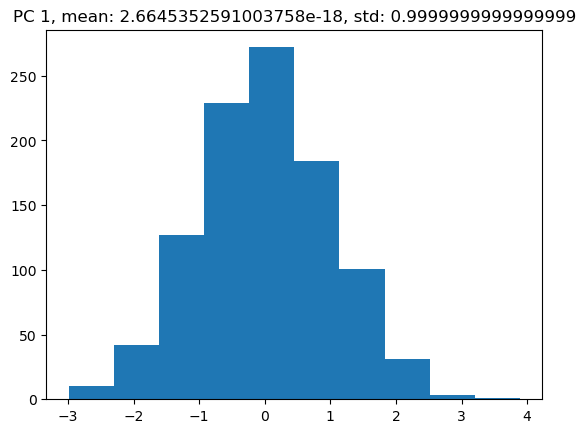

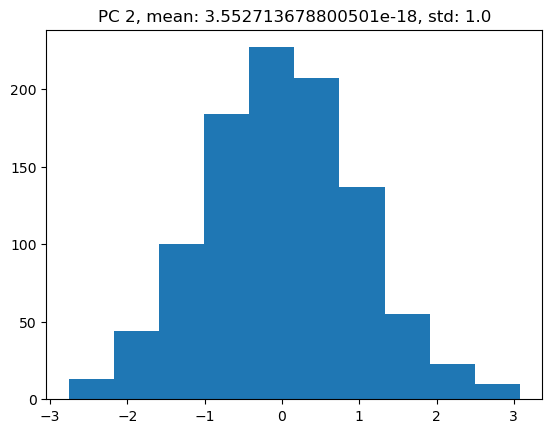

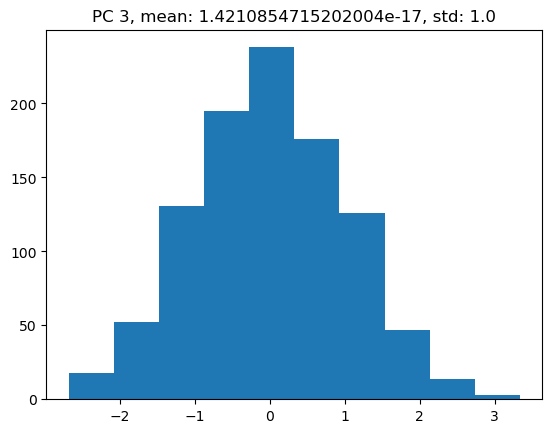

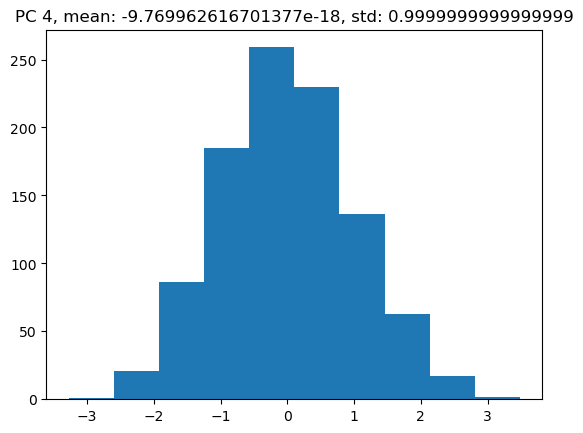

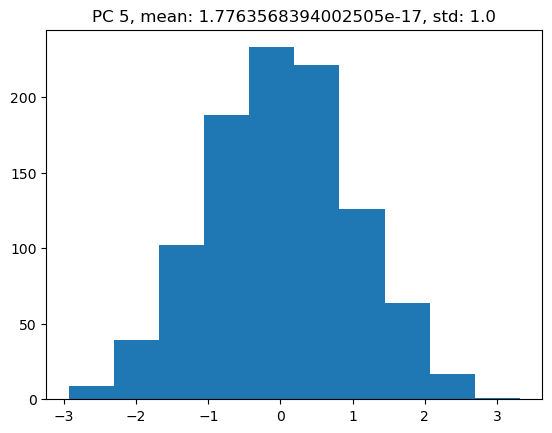

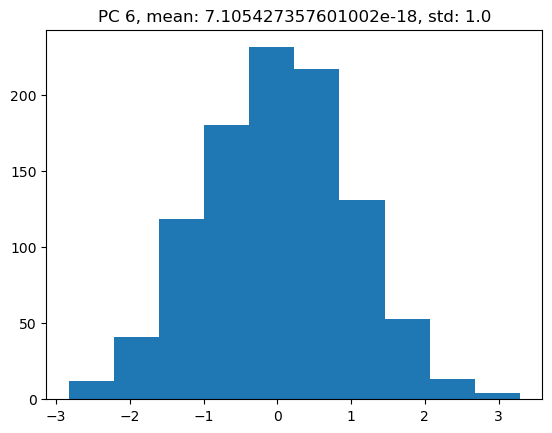

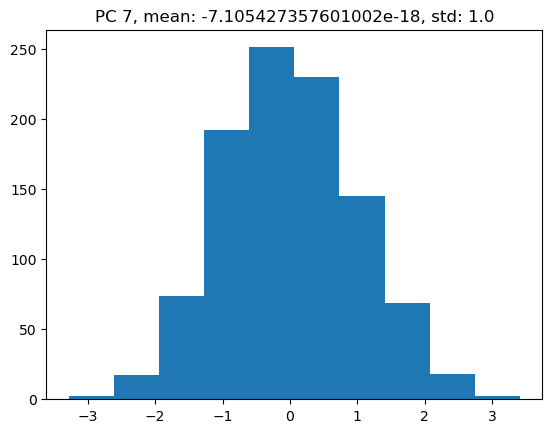

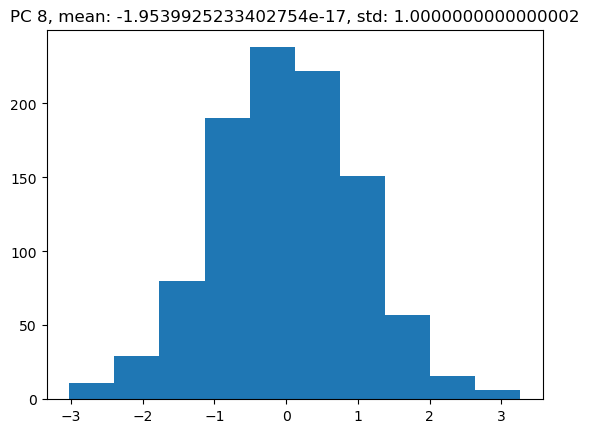

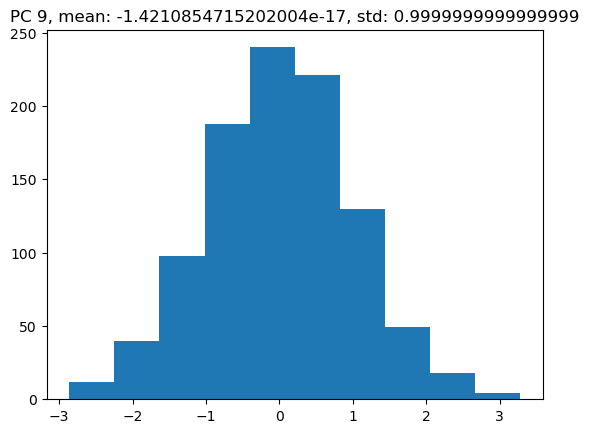

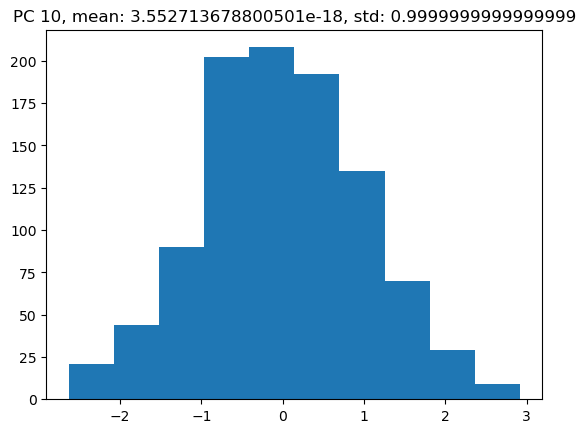

In [ ]:
# checking the train standardisation
print(model3.x_train_pca.shape)

for PC in range(10):
    plt.figure()
    plt.hist(model3.x_train_pca[:, PC])
    plt.title(f"x_train PC {PC+1}, mean: {np.mean(model3.x_train_pca[:, PC])}, std: {np.std(model3.x_train_pca[:, PC])}")
    plt.show()

mean relative L2: 0.7605814185129308


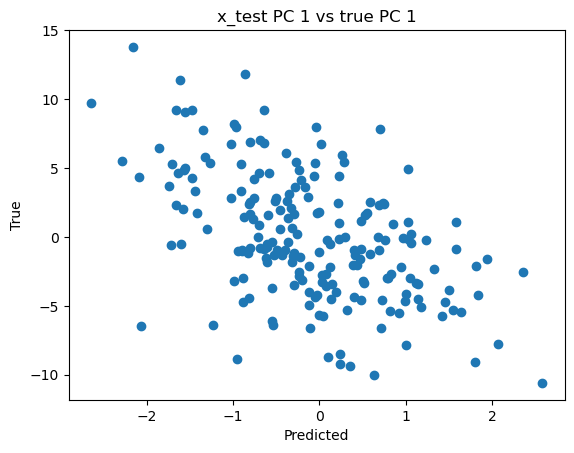

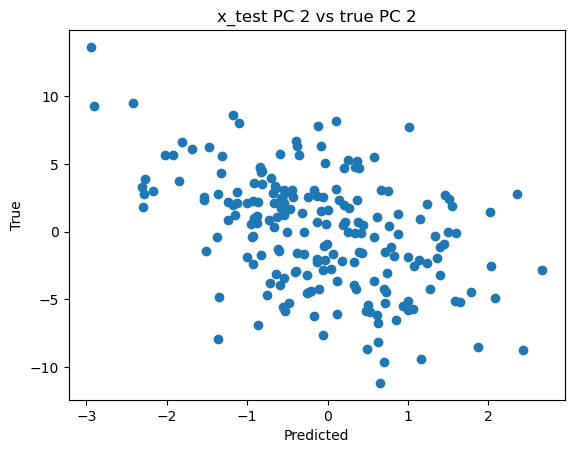

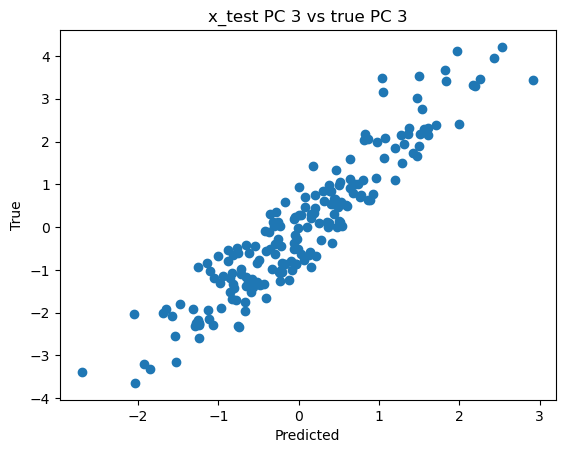

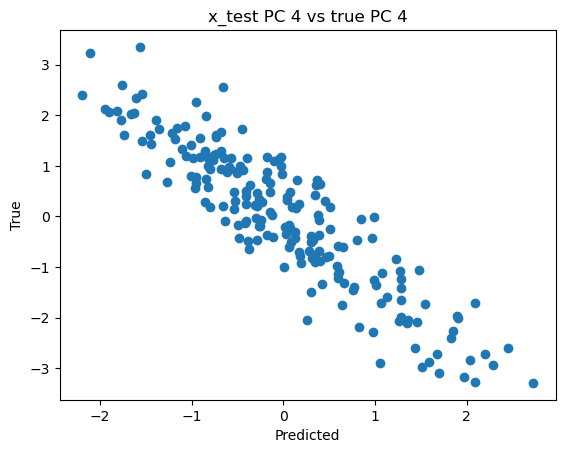

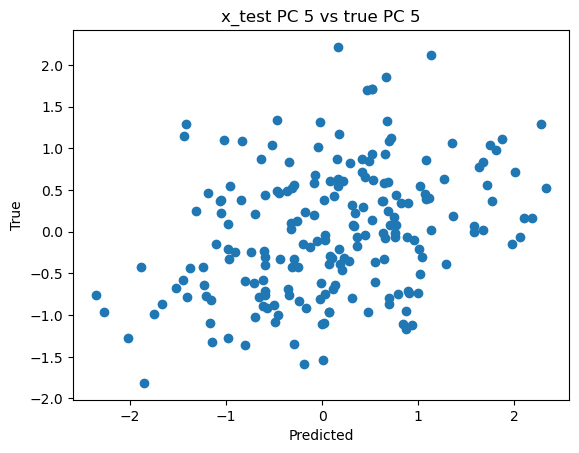

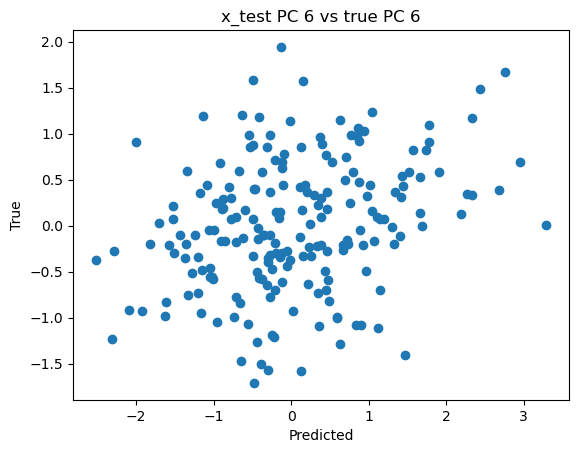

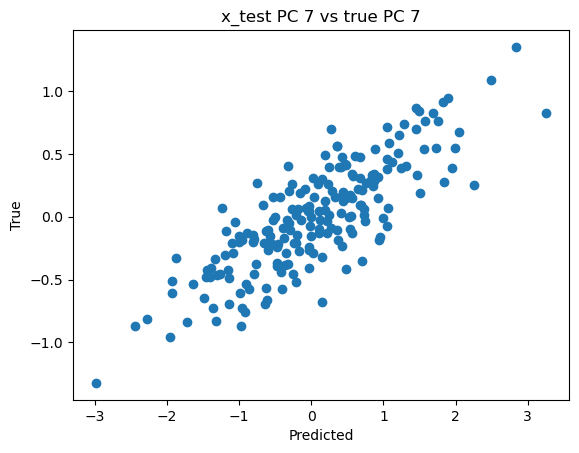

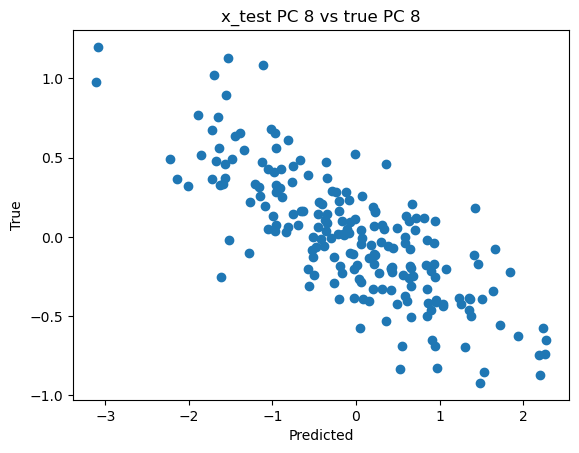

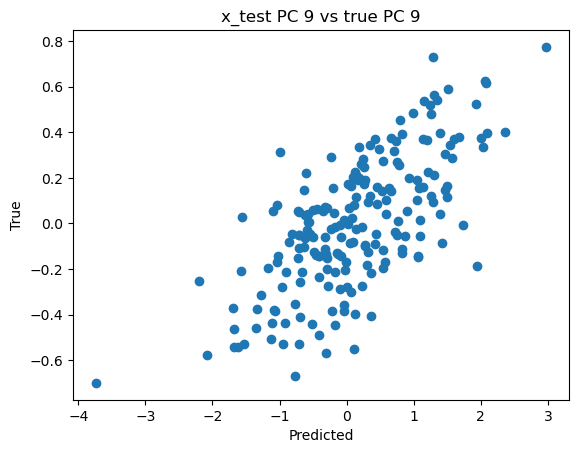

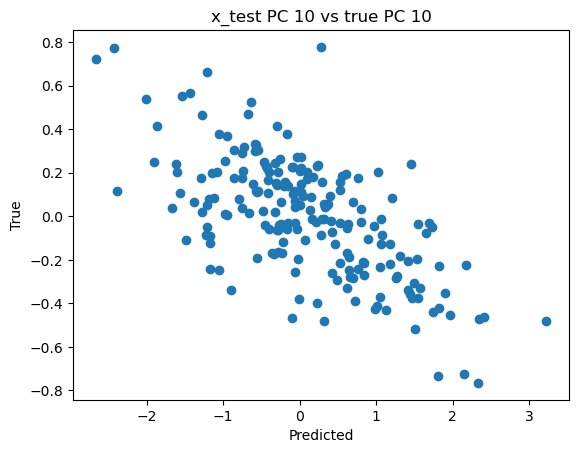

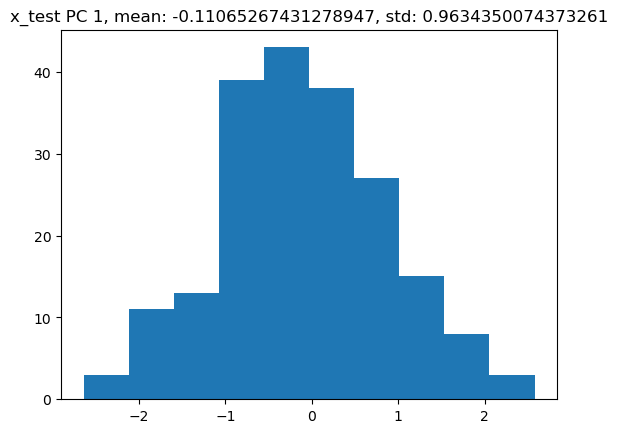

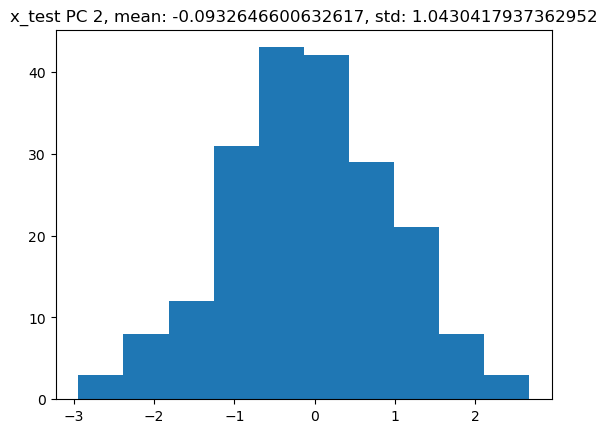

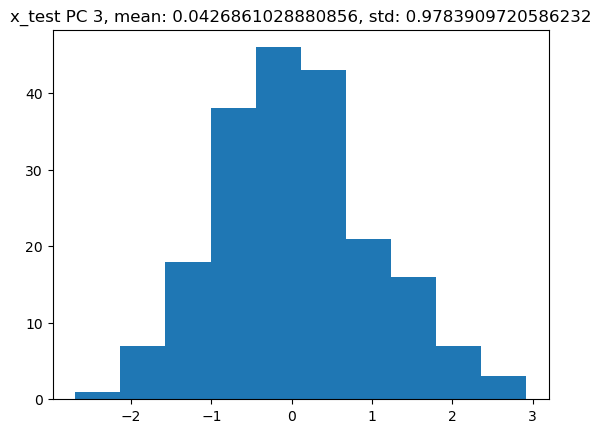

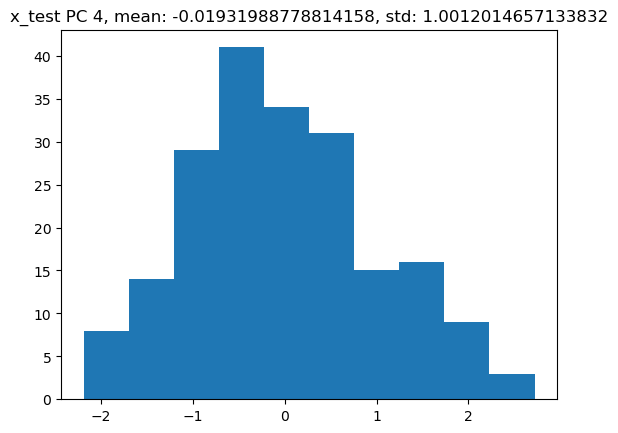

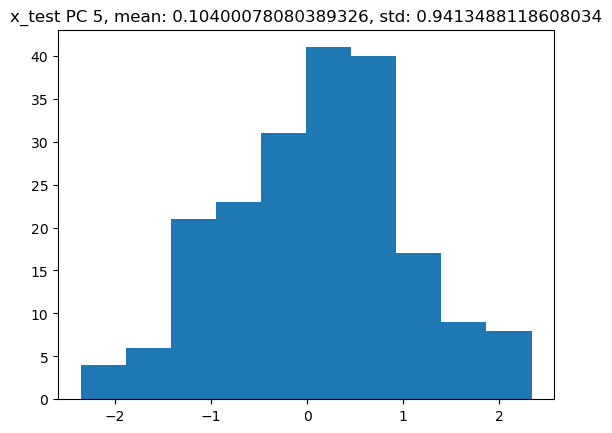

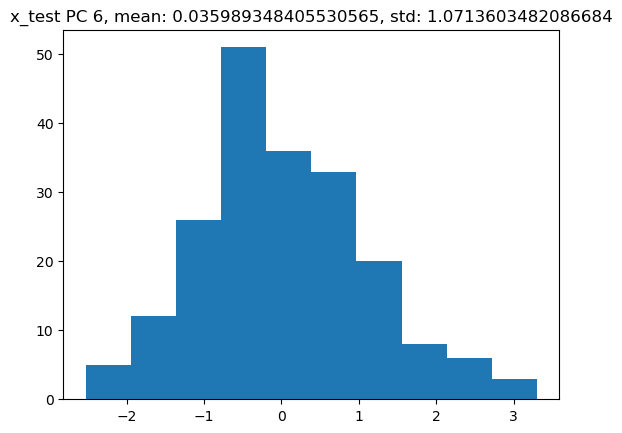

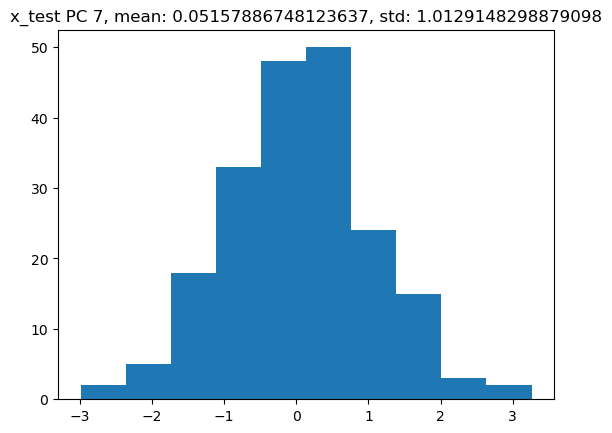

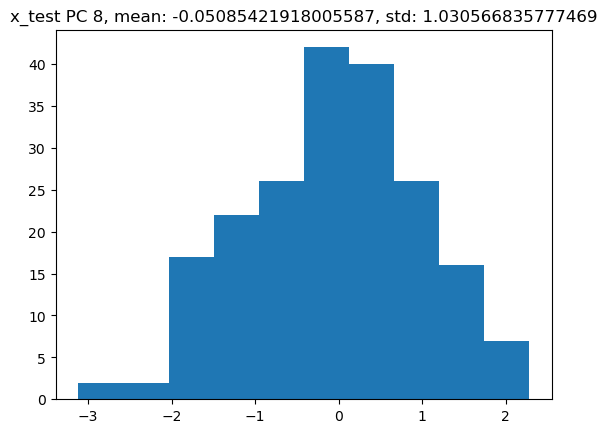

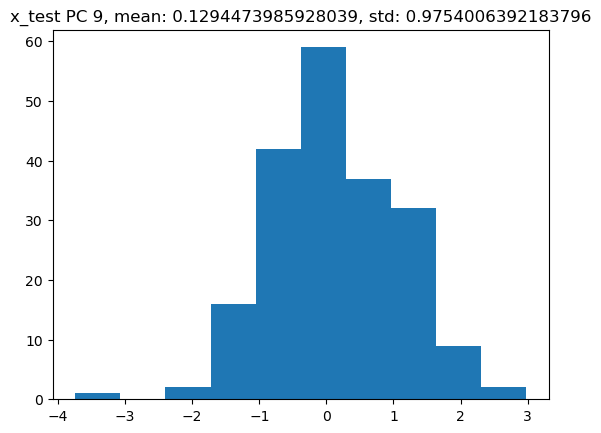

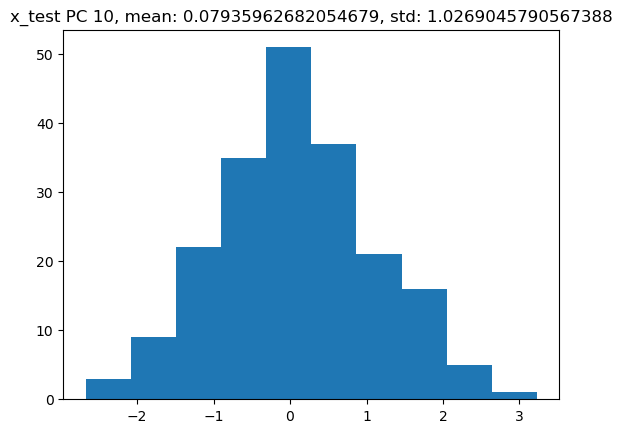

In [ ]:
y_pred, y_pred_lower, y_pred_upper = model3.predict(x_test)

relative_L2 = np.linalg.norm(y_pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1)
print(f'mean relative L2: {np.mean(relative_L2)}')

# check the x_test PCA, test results vs ground truth
for PC in range(10):
    pred = model3.x_test_pca[:, PC]
    truth = PCA(m).fit_transform(x_test)[:, PC]
    plt.figure()
    plt.plot(pred, truth, 'o')
    plt.title(f"x_test PC {PC+1} vs true PC {PC+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# check the x_test standardisation - seems to be working
for PC in range(10):
    data = model3.x_test_pca[:, PC]
    plt.figure()
    plt.hist(data)
    plt.title(f"x_test PC {PC+1}, mean: {np.mean(data)}, std: {np.std(data)}")
    plt.show()

# # check the y_test standardisation
# y_test_low_dim = 
# for PC in range(10):
#     data = model3.x_test_pca[:, PC]
#     plt.figure()
#     plt.hist(data)
#     plt.title(f"x_test PC {PC+1}, mean: {np.mean(data)}, std: {np.std(data)}")
#     plt.show()

# # check the low dim regressor
# for PC in range(10):
#     plt.figure()
#     y_test_pca_pred